In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import xgboost as xgb
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [4]:
# Directory containing all your CSV files
directory_path = '../Final Assignment/raw_data/'

# List all files in the directory
all_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

# Initialize an empty list to hold dataframes
dfs = []

# Loop through each file, read the CSV, and append to the list
for file in all_files:
    file_loaded = False
    
    # List of encodings to try
    encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(os.path.join(directory_path, file), encoding=encoding)
            dfs.append(df)
            file_loaded = True
            break
        except:
            pass
    
    if not file_loaded:
        print(f"Failed to load {file}. It might have a different encoding or contains other issues.")

# Concatenate all dataframes together
merged_data = pd.concat(dfs, ignore_index=True)
merged_data = merged_data.drop(['Unnamed: 2','Unnamed: 0','¸\\'], axis = 1)

merged_data_cleaned = merged_data.dropna(subset=['Actiware classification', 'Actiwatch activity counts', 'Apple Watch ENMO', 'timestamp'])

# Splitting data into training and testing sets (80% train, 20% test)
X = merged_data_cleaned[['Apple Watch ENMO']]
y = merged_data_cleaned['Actiware classification']


Failed to load ._p12_n01_ready.csv. It might have a different encoding or contains other issues.


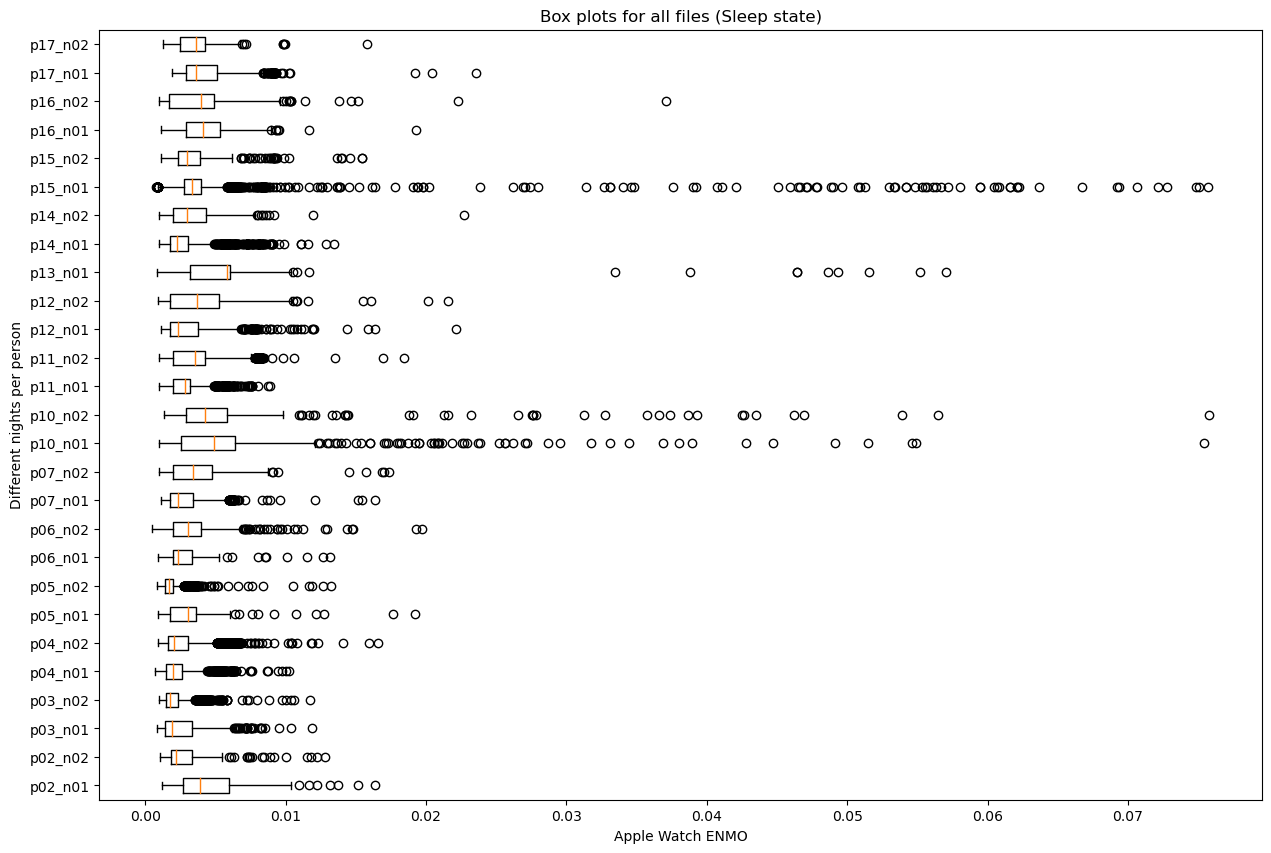

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing all your CSV files
directory_path = '../Final Assignment/raw_data/'

# List all files in the directory
all_files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f)) and not f.startswith("._")]

# Filter out AppleDouble files
all_files = [file for file in all_files if not file.startswith("._")]

data_to_plot = []
labels = []

# Initialize an empty list to hold all dataframes
all_dataframes = []

# Loop through each file
for file in all_files:
    #print(f"Processing {file}...")
    
    # Try to load the file
    for encoding in ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']:
        try:
            df = pd.read_csv(os.path.join(directory_path, file), encoding=encoding)
            
            # Clean the data
            df_cleaned = df.drop(['Unnamed: 2','Unnamed: 0','¸\\'], axis=1, errors='ignore')
            df_cleaned = df_cleaned.dropna(subset=['Actiware classification', 'Actiwatch activity counts', 'Apple Watch ENMO', 'timestamp'])
            
            # Append the cleaned dataframe to the list
            all_dataframes.append(df_cleaned)
            
            # Filter for sleep state
            sleep_data = df_cleaned[df_cleaned['Actiware classification'] == 0]['Apple Watch ENMO']
            
            data_to_plot.append(sleep_data)
            labels.append(file)
            break
        except Exception as e:
            print(f"Failed with encoding {encoding} due to error: {e}")

# Merge all dataframes into one
final_merged_df = pd.concat(all_dataframes)

# Save the merged dataframe
final_merged_df.to_csv("final_merged.csv", index=False)

# Create a combined box plot
plt.figure(figsize=(15, 10))
plt.boxplot(data_to_plot, vert=False)
labels = [label.replace("_ready.csv", "") for label in labels]
plt.yticks(range(1, len(labels) + 1), labels)
plt.xlabel("Apple Watch ENMO")
plt.ylabel("Different nights per person")
plt.title("Box plots for all files (Sleep state)")
plt.show()


## For class 1

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train['Apple Watch ENMO'].fillna(X_train['Apple Watch ENMO'].median(), inplace=True)
X_test['Apple Watch ENMO'].fillna(X_test['Apple Watch ENMO'].median(), inplace=True)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Compute and display metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9427519934573707
Precision: 0.6502976190476191
Recall: 0.573490813648294
F1 Score: 0.6094839609483961

Confusion Matrix:
 [[8785  235]
 [ 325  437]]


## For class 0

Metrics for Class 0 (Sleep):
Accuracy: 0.9427519934573707
Precision: 0.964324917672887
Recall: 0.9739467849223947
F1 Score: 0.9691119691119692

Confusion Matrix:
 [[8785  235]
 [ 325  437]]


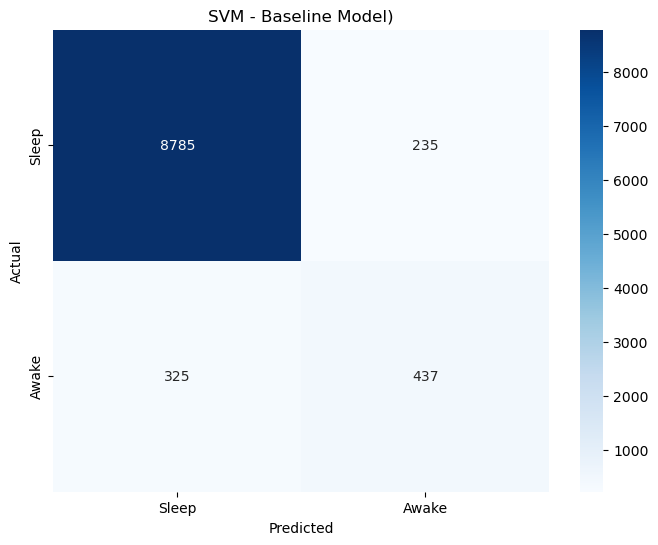

In [105]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Get indices of rows with NaN values in y_test
nan_indices = y_test[y_test.isnull()].index

# Drop these indices from y_test and y_pred
y_test = y_test.drop(nan_indices)
y_pred = [y_pred[i] for i in range(len(y_pred)) if i not in nan_indices]

# Filtering out rows where y_test contains NaN values
y_test_filtered = y_test.dropna()

# Create a mapping from old indices to new indices
index_mapping = {old_index: new_index for new_index, old_index in enumerate(y_test_filtered.index)}

# Use this mapping to filter y_pred
y_pred_filtered = [y_pred[index_mapping[i]] for i in y_test_filtered.index]

# Compute metrics for class 0
print("Metrics for Class 0 (Sleep):")
print("Accuracy:", accuracy_score(y_test_filtered, y_pred_filtered))
print("Precision:", precision_score(y_test_filtered, y_pred_filtered, pos_label=0))
print("Recall:", recall_score(y_test_filtered, y_pred_filtered, pos_label=0))
print("F1 Score:", f1_score(y_test_filtered, y_pred_filtered, pos_label=0))
conf_matrix = confusion_matrix(y_test_filtered, y_pred_filtered)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
labels = ['Sleep', 'Awake']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("SVM - Baseline Model)")
plt.show()


Please remember to address class imbalance issue in the model explanations (8% (class 1- Awake) to 92%(class 0- Sleep)). Thats crucial. 

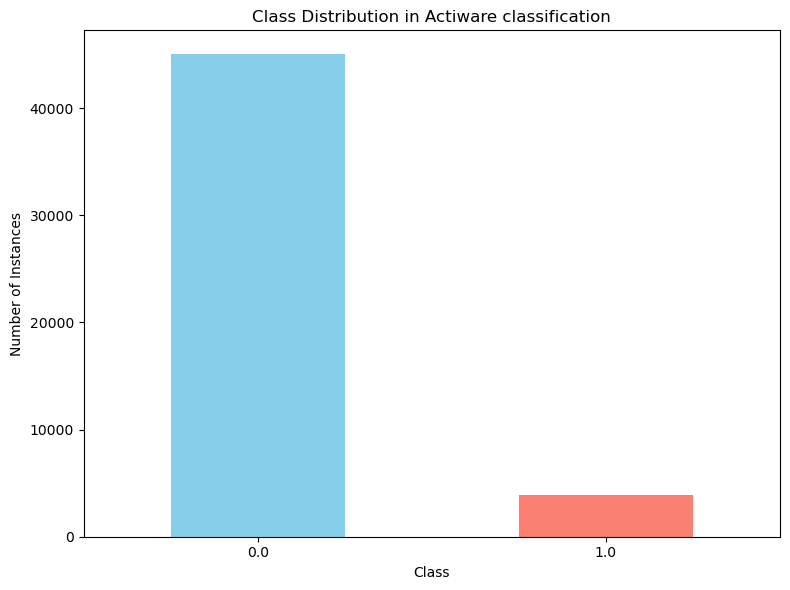

In [19]:
# Getting counts of each class
class_counts = merged_data['Actiware classification'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution in Actiware classification')
plt.ylabel('Number of Instances')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Oversampling-Undersampling method

In [20]:
ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [21]:
# Re-splitting the data into training and testing sets (80% train, 20% test)
X = merged_data[['Apple Watch ENMO']]
y = merged_data['Actiware classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill in missing values in X_train and X_test
X_train['Apple Watch ENMO'].fillna(X_train['Apple Watch ENMO'].median(), inplace=True)
X_test['Apple Watch ENMO'].fillna(X_test['Apple Watch ENMO'].median(), inplace=True)

# Remove rows where 'Actiware classification' is NaN in the training set
nan_indices_train = y_train[y_train.isnull()].index
X_train = X_train.drop(nan_indices_train)
y_train = y_train.drop(nan_indices_train)

# Remove rows where 'Actiware classification' is NaN in the testing set
nan_indices_test = y_test[y_test.isnull()].index
X_test = X_test.drop(nan_indices_test)
y_test = y_test.drop(nan_indices_test)

# Train the Random Forest classifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)

# Predict on the test set
y_pred = clf2.predict(X_test)

# Compute the metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9411824772796896
Precision: 0.6545454545454545
Recall: 0.5538461538461539
F1 Score: 0.6000000000000001

Confusion Matrix:
 [[8785  228]
 [ 348  432]]


#### Uncomment the following if you would like to run a GridSearchCV hyperparameter tuning.

In [22]:
#from sklearn.model_selection import GridSearchCV
#
## Define the parameter grid
#param_grid = {
#    'n_estimators': [10, 50, 100, 200],
#    'max_features': ['auto', 'sqrt'],
#    'max_depth': [10, 20, 30, None],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'bootstrap': [True, False]
#}
#
## Create a base model
#rf = RandomForestClassifier(random_state=42)
#
## Instantiate the grid search model
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
#
## Fit the grid search to the data
#grid_search.fit(X_train, y_train)
#
## Print the best hyperparameters
#print("Best hyperparameters:", grid_search.best_params_)


Already saved the output(tuned parameter configurations) in local machine with file name 'best_rf_model.pkl'

In [23]:
## Save the model
#best_rf_model = grid_search.best_estimator_
#joblib.dump(best_rf_model, 'best_rf_model.pkl')
#

In [106]:
# Load the saved model
best_rf_model = joblib.load('best_rf_model.pkl')

# Predict on the test set
y_pred_best = best_rf_model.predict(X_test)

# Compute the metrics
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Accuracy: 0.964015538744633
Precision: 0.8768382352941176
Recall: 0.6259842519685039
F1 Score: 0.7304747320061256

Confusion Matrix:
 [[8953   67]
 [ 285  477]]


### ROC Curve

In [25]:
y_prob_1 = clf.predict_proba(X_test)[:, 1]
y_prob_2 = clf2.predict_proba(X_test)[:, 1]
y_prob_3 = best_rf_model.predict_proba(X_test)[:, 1]


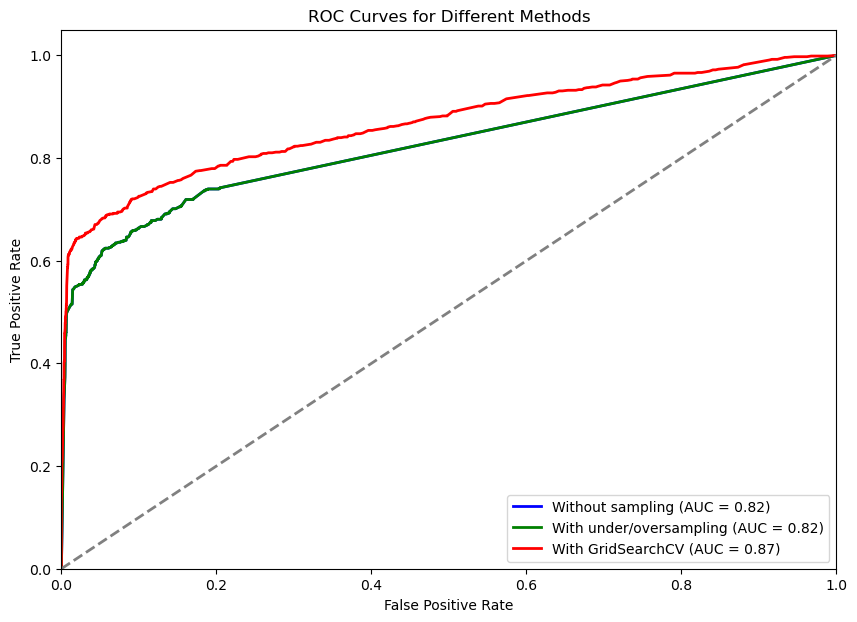

In [26]:
# Compute ROC curve and AUC for the first method
fpr1, tpr1, _ = roc_curve(y_test, y_prob_1)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve and AUC for the second method
fpr2, tpr2, _ = roc_curve(y_test, y_prob_2)
roc_auc2 = auc(fpr2, tpr2)

# Compute ROC curve and AUC for the third method
fpr3, tpr3, _ = roc_curve(y_test, y_prob_3)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Without sampling (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'With under/oversampling (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'With GridSearchCV (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Methods')
plt.legend(loc="lower right")
plt.show()


### Class Weighting - Mark's technique

In [107]:
final_merged = merged_data
final_merged['timestamp'] = pd.to_datetime(final_merged['timestamp'], dayfirst=True)

unique_day_month = final_merged['timestamp'].dt.strftime('%d-%B').unique()

unique_day_month

array([nan, '01-January', '02-January', '03-January', '04-January',
       '05-January', '06-January', '07-January', '08-January',
       '09-January', '10-January', '11-January', '12-January',
       '13-January', '14-January', '15-January', '16-January',
       '17-January', '18-January', '19-January', '20-January',
       '21-January', '22-January', '23-January', '24-January',
       '25-January', '26-January', '27-January', '28-January'],
      dtype=object)

In [108]:
# drop 'Actiwatch activity counts' based on dimitri remarks
january_data = final_merged.drop(columns=['Actiwatch activity counts'])


# Since 'Actiware classification' is our ground truth, we drop rows where this column has missing values
january_data = january_data.dropna(subset=['Actiware classification'])

# replace missing values with the median, so it wont affect by extreme values or outliers in the data
january_data['Apple Watch ENMO'].fillna(january_data['Apple Watch ENMO'].median(), inplace=True)

In [109]:
from sklearn.model_selection import train_test_split
# Split dataset
X = january_data[['Apple Watch ENMO']]
y = january_data['Actiware classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

X_train.shape, X_test.shape

((34243, 1), (14676, 1))

In [110]:
#Addition steps
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights = {0: class_weights[0], 1: class_weights[1]}
weights

{0: 0.5439195628693055, 1: 6.1922242314647375}

### Class 1

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf_rf = RandomForestClassifier(n_estimators=100, class_weight=weights, random_state=43)

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9237530662305805
Precision: 0.5046583850931677
Recall: 0.5747126436781609
F1 Score: 0.5374121537825548

Confusion Matrix:
 [[12907   638]
 [  481   650]]


### Class 0

Accuracy: 0.9237530662305805
Precision for Class 0: 0.9640723035554227
Recall for Class 0: 0.9528977482465855
F1 Score for Class 0: 0.9584524560947537

Confusion Matrix:
 [[12907   638]
 [  481   650]]


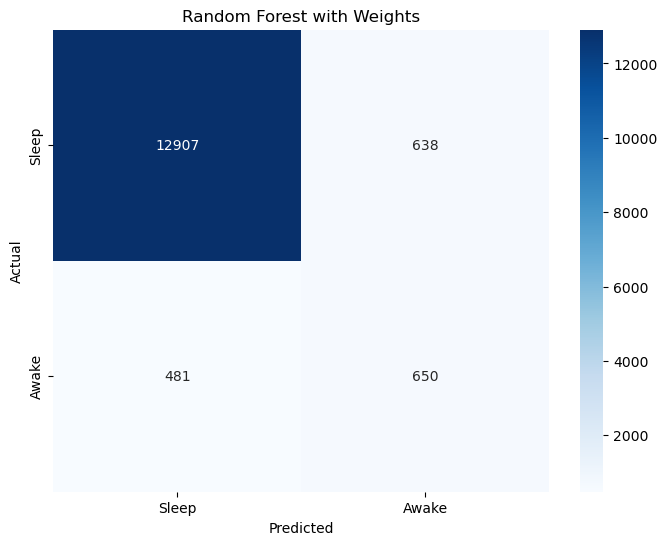

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf_rf = RandomForestClassifier(n_estimators=100, class_weight=weights, random_state=43)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

# Compute the metrics, focusing on Class 0 (sleep)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision for Class 0:", precision_score(y_test, y_pred, pos_label=0))
print("Recall for Class 0:", recall_score(y_test, y_pred, pos_label=0))
print("F1 Score for Class 0:", f1_score(y_test, y_pred, pos_label=0))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
labels = ['Sleep', 'Awake']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Random Forest with Weights")
plt.show()

### Gridsearch Hyperparam tuning with class weights

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Set the class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights = {0: class_weights[0], 1: class_weights[1]}

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [weights]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best hyperparameters: {'bootstrap': True, 'class_weight': {0: 0.5439195628693055, 1: 6.1922242314647375}, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [33]:
# Save the best model from grid search
joblib.dump(grid_search.best_estimator_, 'best_rf_model_with_weights.pkl')


['best_rf_model_with_weights.pkl']

### Class 1

In [113]:
# Load the saved model
best_rf_model_with_weights = joblib.load('best_rf_model_with_weights.pkl')

# Predict on the test set
y_pred_with_weights = best_rf_model_with_weights.predict(X_test)

# Compute and display the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_with_weights))
print("Precision:", precision_score(y_test, y_pred_with_weights))
print("Recall:", recall_score(y_test, y_pred_with_weights))
print("F1 Score:", f1_score(y_test, y_pred_with_weights))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_with_weights))


Accuracy: 0.9352684655219405
Precision: 0.5713159968479118
Recall: 0.6410256410256411
F1 Score: 0.6041666666666667

Confusion Matrix:
 [[13001   544]
 [  406   725]]


### Class 0

Accuracy: 0.9352684655219405
Precision for Class 0: 0.9697173118520176
Recall for Class 0: 0.9598375784422296
F1 Score for Class 0: 0.9647521519738795

Confusion Matrix:
 [[13001   544]
 [  406   725]]


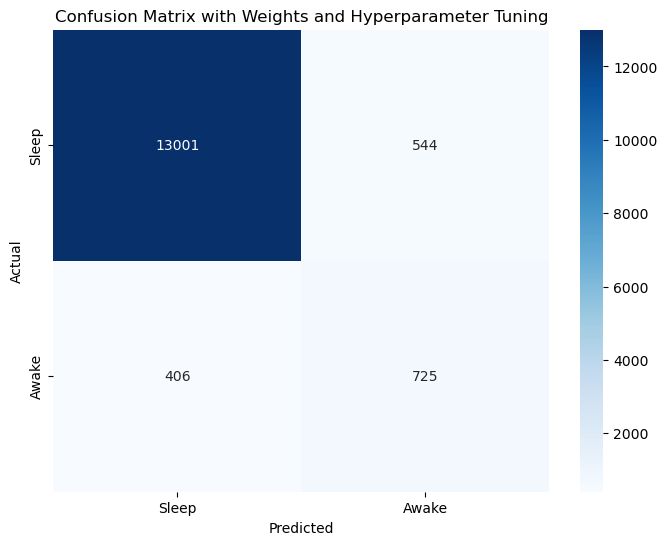

In [116]:
model_filename = 'best_rf_model_with_weights.pkl'

# Load the saved model
best_rf_model_with_weights = load(model_filename)

# Predict on the test set
y_pred_with_weights = best_rf_model_with_weights.predict(X_test)

# Compute the metrics, focusing on Class 0 (sleep)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_with_weights))
print("Precision for Class 0:", precision_score(y_test, y_pred_with_weights, pos_label=0))
print("Recall for Class 0:", recall_score(y_test, y_pred_with_weights, pos_label=0))
print("F1 Score for Class 0:", f1_score(y_test, y_pred_with_weights, pos_label=0))
conf_matrix = confusion_matrix(y_test, y_pred_with_weights)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
labels = ['Sleep', 'Awake']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix with Weights and Hyperparameter Tuning")
plt.show()

## ROC

Without GridSearch and without class weight balancing (Method 1)

In [52]:
y_prob_1_class_1 = clf.predict_proba(X_test)[:, 1]
y_prob_1_class_0 = clf.predict_proba(X_test)[:, 0]


With class weighting (Method 2)

In [53]:
y_prob_2_class_1 = clf_rf.predict_proba(X_test)[:, 1]
y_prob_2_class_0 = clf_rf.predict_proba(X_test)[:, 0]


With GridSearch (Method 3)

In [54]:
y_prob_3_class_1 = best_rf_model_with_weights.predict_proba(X_test)[:, 1]
y_prob_3_class_0 = best_rf_model_with_weights.predict_proba(X_test)[:, 0]


## Class 1 ROC

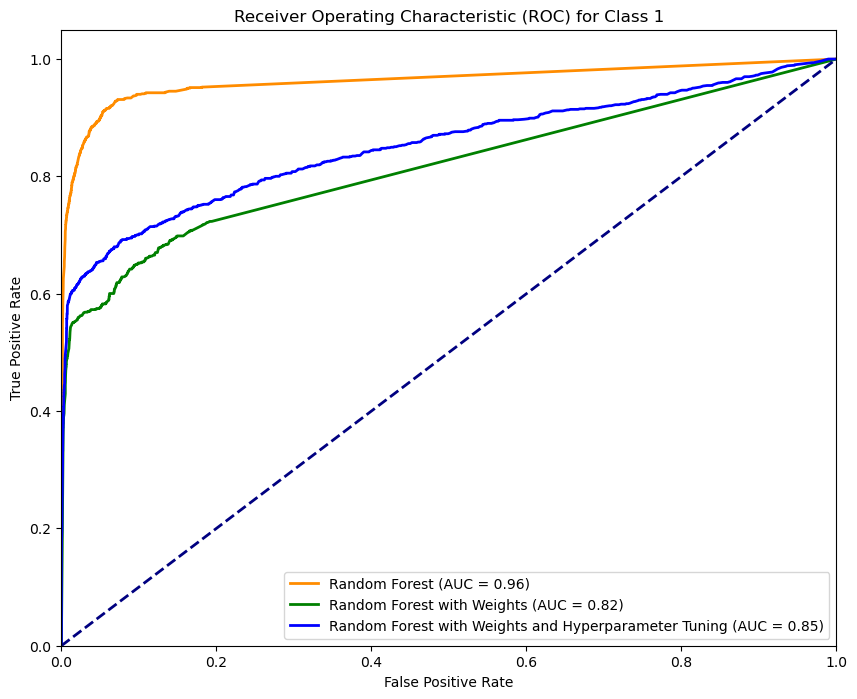

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# For Method 1
fpr1_1, tpr1_1, _ = roc_curve(y_test, y_prob_1_class_1)
roc_auc1_1 = auc(fpr1_1, tpr1_1)

# For Method 2
fpr2_1, tpr2_1, _ = roc_curve(y_test, y_prob_2_class_1)
roc_auc2_1 = auc(fpr2_1, tpr2_1)

# For Method 3
fpr3_1, tpr3_1, _ = roc_curve(y_test, y_prob_3_class_1)
roc_auc3_1 = auc(fpr3_1, tpr3_1)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(fpr1_1, tpr1_1, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc1_1:0.2f})')
plt.plot(fpr2_1, tpr2_1, color='green', lw=2, label=f'Random Forest with Weights (AUC = {roc_auc2_1:0.2f})')
plt.plot(fpr3_1, tpr3_1, color='blue', lw=2, label=f'Random Forest with Weights and Hyperparameter Tuning (AUC = {roc_auc3_1:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Class 1')
plt.legend(loc="lower right")
plt.show()


## Class 0 ROC

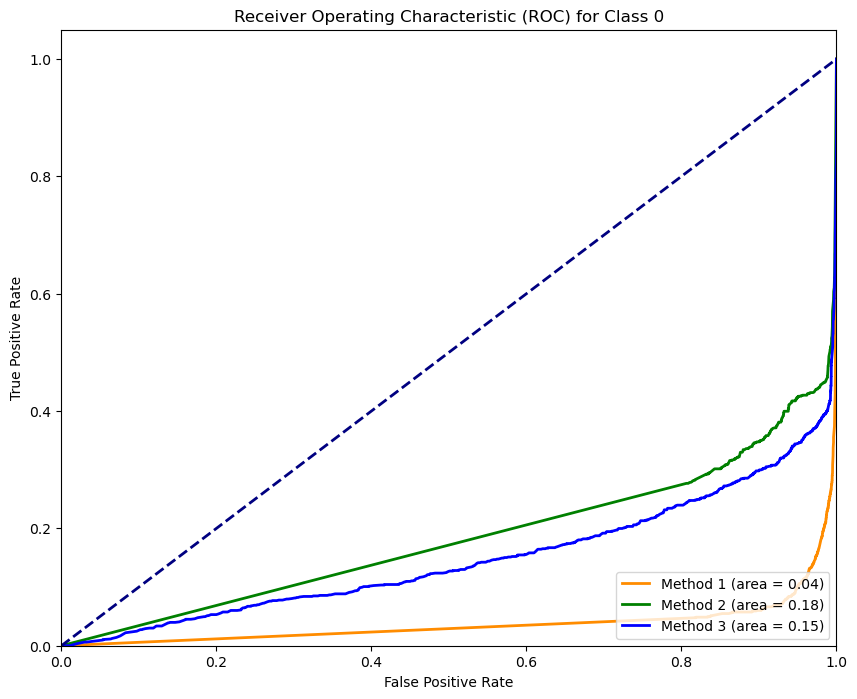

In [57]:
# For Method 1
fpr1_0, tpr1_0, _ = roc_curve(y_test, y_prob_1_class_0)
roc_auc1_0 = auc(fpr1_0, tpr1_0)

# For Method 2
fpr2_0, tpr2_0, _ = roc_curve(y_test, y_prob_2_class_0)
roc_auc2_0 = auc(fpr2_0, tpr2_0)

# For Method 3
fpr3_0, tpr3_0, _ = roc_curve(y_test, y_prob_3_class_0)
roc_auc3_0 = auc(fpr3_0, tpr3_0)

# Plot
plt.figure(figsize=(10, 8))
plt.plot(fpr1_0, tpr1_0, color='darkorange', lw=2, label=f'Method 1 (area = {roc_auc1_0:0.2f})')
plt.plot(fpr2_0, tpr2_0, color='green', lw=2, label=f'Method 2 (area = {roc_auc2_0:0.2f})')
plt.plot(fpr3_0, tpr3_0, color='blue', lw=2, label=f'Method 3 (area = {roc_auc3_0:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Class 0')
plt.legend(loc="lower right")
plt.show()


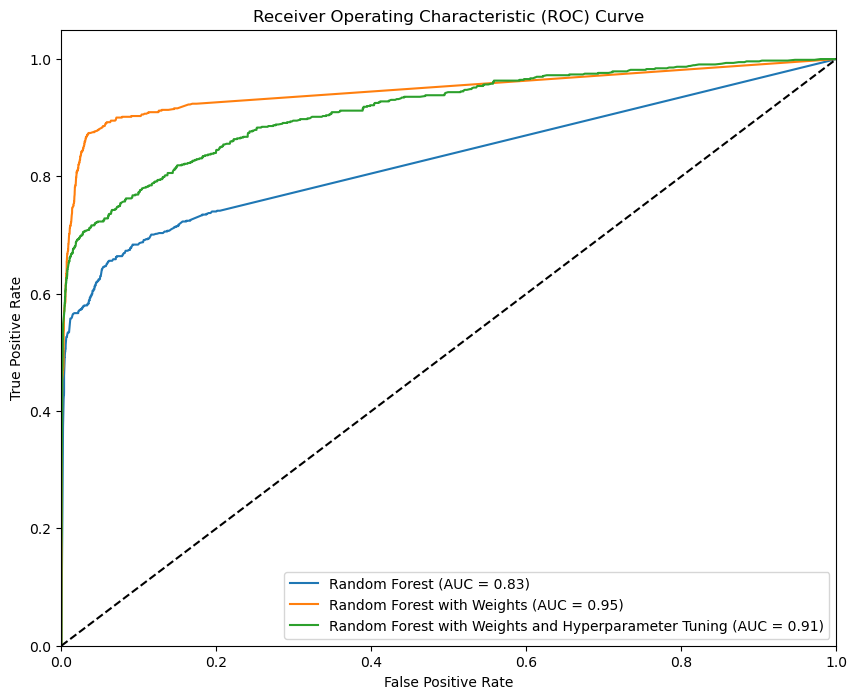

In [81]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize your classifiers
clfs = {
    "Random Forest": clf,  # Assuming clf is your classifier without weights & hyperparameters for Class 1
    "Random Forest with Weights": clf_rf,  # and so on for other classifiers...
    "Random Forest with Weights and Hyperparameter Tuning": best_rf_model_with_weights
    #... add all your classifiers here
}

plt.figure(figsize=(10, 8))

# For each classifier
for name, classifier in clfs.items():
    # Get the probability scores
    probas_ = classifier.predict_proba(X_test)
    
    # Get the ROC curve values
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    
    # Compute Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()


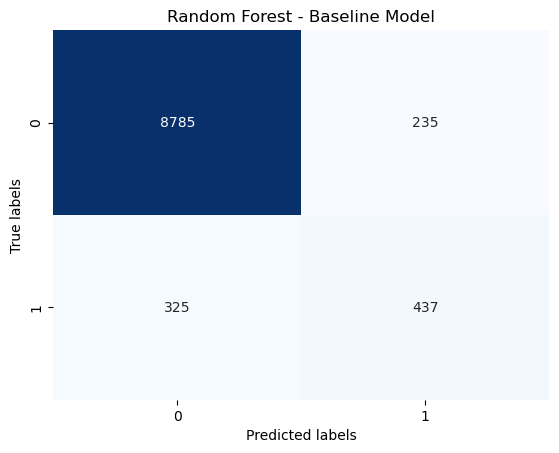

In [88]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
plot_confusion_matrix(y_test, y_pred1, "Random Forest - Baseline Model")


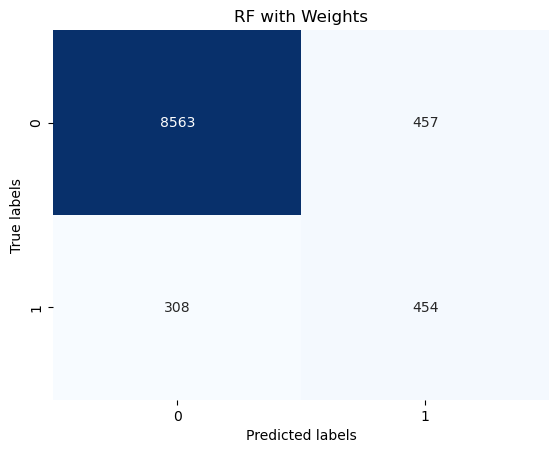

In [89]:
class_weights = {0: weights[0], 1: weights[1]}
clf2 = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
plot_confusion_matrix(y_test, y_pred2, "RF with Weights")


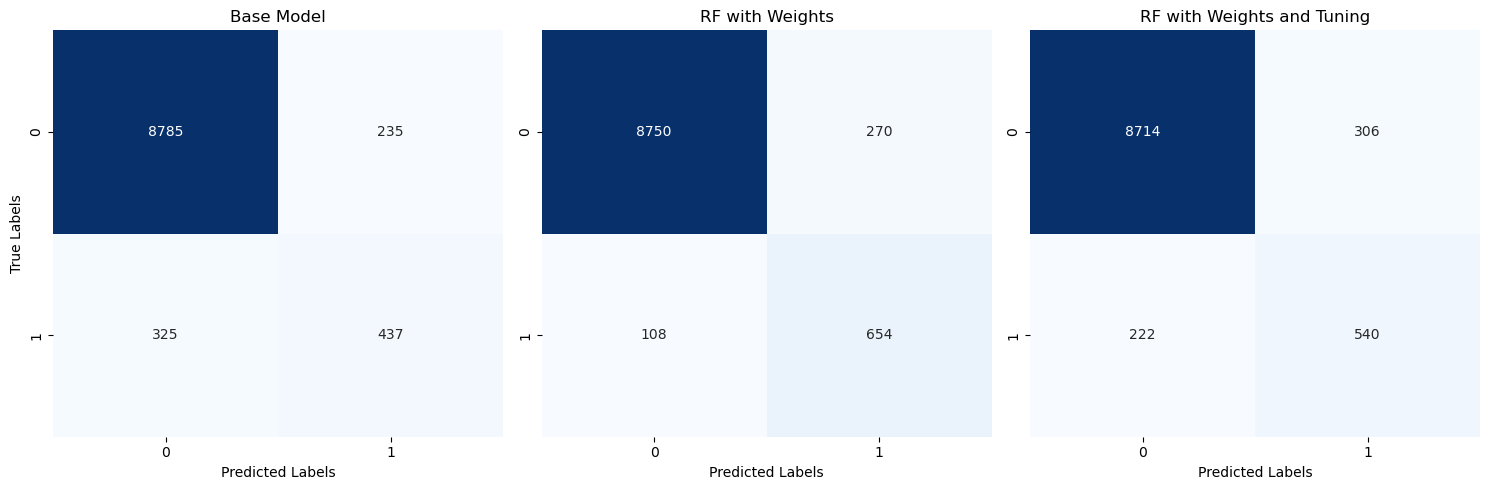

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot confusion matrices side by side
def plot_multiple_confusion_matrices(matrices, titles):
    fig, axes = plt.subplots(1, len(matrices), figsize=(15,5))
    for ax, matrix, title in zip(axes, matrices, titles):
        sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(title)
        ax.set_xlabel('Predicted Labels')
        if ax is axes[0]:
            ax.set_ylabel('True Labels')
    plt.tight_layout()
    plt.show()

# 1. Base Model
y_pred1 = clf.predict(X_test)
nan_indices = y_test[y_test.isnull()].index
y_test1 = y_test.drop(nan_indices)
y_pred1 = [y_pred1[i] for i in range(len(y_pred1)) if i not in nan_indices]
cm1 = confusion_matrix(y_test1, y_pred1)

# 2. RF with Weights
y_pred2 = clf_rf.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)

# 3. RF with Weights and Hyperparameter Tuning
y_pred3 = best_rf_model_with_weights.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)

# Plot them all
plot_multiple_confusion_matrices([cm1, cm2, cm3], 
                                 ['Base Model', 'RF with Weights', 'RF with Weights and Tuning'])
